<center>

# Apresentação TDC - Bruno Raphaell Alves de Matos

<img src="https://mytechdecisions.com/wp-content/uploads/2021/02/AdobeStock_382844018-1000x500.jpeg" alt="" height="400" width="800">

</center>

--------

In [6]:
# Importando a biblioteca nltk

import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Bruno\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

## Lendo e explorando o dataset:
_____

In [7]:
import pandas as pd

# Lendo o arquivo tsv - "Tab Separated Values" (Valores Separados por Tabulação)
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', names=['Classe', "Texto"], header=None)

data.head()

,Classe,Texto
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


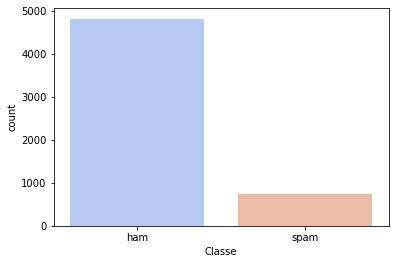

In [4]:
import seaborn as sns
sns.countplot(x = data['Classe'],palette='coolwarm');

In [8]:
# Imprimindo um SMS spam e outro ham

print(f"SMS classificado como ham:\n{data.Texto[0]}", end="\n\n")
print("Tradução ham: Eu tenho procurado as palavras certas para agradecer por este respiro. Prometo que não tomarei sua ajuda como garantida e cumprirei minha promessa. Você tem sido maravilhoso e uma bênção em todos os momentos.", end="\n\n")

print(f"SMS classificado como spam:\n{data.Texto[1]}", end="\n\n")
print("Tradução spam: Entrada gratuita em 2 competições semanais para vencer a final da FA Cup em 21 de maio de 2005. Envie FA para 87121 para receber a pergunta de entrada (taxa de texto padrão) T&Cs aplicáveis 08452810075 para maiores de 18 anos")

SMS classificado como ham:
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

Tradução ham: Eu tenho procurado as palavras certas para agradecer por este respiro. Prometo que não tomarei sua ajuda como garantida e cumprirei minha promessa. Você tem sido maravilhoso e uma bênção em todos os momentos.

SMS classificado como spam:
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Tradução spam: Entrada gratuita em 2 competições semanais para vencer a final da FA Cup em 21 de maio de 2005. Envie FA para 87121 para receber a pergunta de entrada (taxa de texto padrão) T&Cs aplicáveis 08452810075 para maiores de 18 anos


### Pré-processamento dos dados:

- 1. Remover pontuação

A pontuação pode fornecer contexto gramatical a uma frase que apóia nossa compreensão. Mas para nosso vetorizador que conta o número de palavras e não o contexto, ele não agrega valor, então removemos todos os caracteres especiais.

In [9]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(texto):
    texto_sem_pontuacao = "".join([char for char in texto if char not in string.punctuation])
    return texto_sem_pontuacao

In [10]:
# Exemplo para entender um pouco melhor como é feito um list comprehension

[numero for numero in range(30) if numero % 3 == 0]

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [12]:
# Criando uma nova coluna com o primeiro tratamento

data['Texto_limpo'] = data['Texto'].apply(lambda x: remove_punctuation(x))

print(data.Texto[0], end='\n\n')
print(data.Texto_limpo[0], end='\n\n')

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times



In [13]:
data.head()

,Classe,Texto,Texto_limpo
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


- 2. Tokenização:

Tokenização é o processo de dividir uma frase em palavras ou tokens individuais.

<center>

![](https://miro.medium.com/max/700/1*oGg_2OyvAwsB5u6-iB1Mfg.png)

Tradução: É assim que você consegue formigas

</center>


In [14]:
# Exemplo de como ficaria o texto tokenizado

from nltk import tokenize 

token_espaco = tokenize.WhitespaceTokenizer()

frase = "Bem vindo ao mundo do PLN!"

token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [15]:
# Criando uma nova coluna com os dados tokenizados

from nltk import tokenize 

token_espaco = tokenize.WhitespaceTokenizer()

data['Texto_tokenizado'] = data.Texto_limpo.apply(lambda x: token_espaco.tokenize(x.lower()))  # You = you

In [16]:
data.head(10)

,Classe,Texto,Texto_limpo,Texto_tokenizado
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2..."


In [17]:
data['Texto_tokenizado'][0]

['ive',
 'been',
 'searching',
 'for',
 'the',
 'right',
 'words',
 'to',
 'thank',
 'you',
 'for',
 'this',
 'breather',
 'i',
 'promise',
 'i',
 'wont',
 'take',
 'your',
 'help',
 'for',
 'granted',
 'and',
 'will',
 'fulfil',
 'my',
 'promise',
 'you',
 'have',
 'been',
 'wonderful',
 'and',
 'a',
 'blessing',
 'at',
 'all',
 'times']

- 3. Remover os stopwords

Stopwords são palavras que aparecerão em qualquer texto, logo não nos ajuda a decidir quais são as palavras mais relevantes para a classificação.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Stop-word-removal-using-NLTK.png">
</center>


In [18]:
import nltk 

stopword = nltk.corpus.stopwords.words('english')  # Todas as stopwords do idioma inglês
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def remover_stopwords(texto_tokenizado):
    text = [word for word in texto_tokenizado if word not in stopword]
    return text

In [20]:
data['Texto_sem_stopwords'] = data.Texto_tokenizado.apply(lambda x: remover_stopwords(x))
data.head()

,Classe,Texto,Texto_limpo,Texto_tokenizado,Texto_sem_stopwords
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [21]:
# Comparando nosso texto inicial com o tratamento até agora:

print(data.Texto[0], end='\n\n')
print(data.Texto_sem_stopwords[0], end='\n\n')

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times']



- 4. Stemming

Stemming reduz a palavra a sua forma radical. 

<center>

<img src="https://devopedia.org/images/article/218/8583.1569386710.png" alt="" height="300" width="400">

|    **Inglês**   | **Tradução** |
|:---------------:|:------------:|
|     Consult     |   Consultar  |
|    Consultant   | Consultor(a) |
|    Consulting   |  Consultando |
| Consultantative |   Consultor  |
|   Consultants   |  Consultores |

</center>



In [22]:
ps = nltk.PorterStemmer()

print(ps.stem('corre'))
print(ps.stem('consultants'))  # Tradução: consultores

corr
consult


In [24]:
def stemming(Texto_sem_stopwords):
    text = [ps.stem(word) for word in Texto_sem_stopwords]
    return text

In [25]:
data['Texto_stemming'] = data.Texto_sem_stopwords.apply(lambda x: stemming(x))

print(data.Texto[0], end='\n\n')
print(data.Texto_stemming[0], end='\n\n')

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

['ive', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time']



In [26]:
data.head()

,Classe,Texto,Texto_limpo,Texto_tokenizado,Texto_sem_stopwords,Texto_stemming
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


## Vetorização de palavras:

A vetorização é o processo de codificação de texto como números inteiros, ou seja, forma numérica para criar vetores de recursos para que os algoritmos de aprendizado de máquina possam entender nossos dados.

-----



- 1. Bag of words (tradução: saco de palavras)

Descreve a presença ou não de uma palavra em um texto. Dá o resultado 1 se a palavra está presente e 0 se não está presente.

<!DOCTYPE html>
<center>
<div class="box">
    <img src="https://i.imgur.com/E4wxC7y.png" alt="" height="400" width="850">
</div>
<div class="box">
    <img src="bag of words.png" height="400" width="250">
</div>
</center>

<style>
div.box {
	width: 450px;
	display: inline-block;
}
</style>

In [27]:
# Generalizando em uma função todos os passos feitos até aqui

from nltk import tokenize 

token_espaco = tokenize.WhitespaceTokenizer()

def clean_text(texto):
    text = "".join([word.lower() for word in texto if word not in string.punctuation])  # Remove a pontuação
    tokens = token_espaco.tokenize(text)  # Tokeniza a frase
    text_sem_stopwords = [ps.stem(word) for word in tokens if word not in stopword]  # Remove stopwords
    text_final = [ps.stem(word) for word in text_sem_stopwords]  # Stemming

    return text_final

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer=clean_text)  # Analyzer é o que vai fazer o tratamento
X_counts = count_vectorizer.fit_transform(data.Texto)
print(X_counts.shape)
print(count_vectorizer.get_feature_names())

(5568, 8168)
['0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0

In [30]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 2. TF-IDF

TF-IDF significa *Term Frequency - Inverse Document Frequency* ou *Frequência do Termo - Inverso da Frequência* no Documento, em tradução livre para o português. Trata-se de medidas estatísticas que demonstram o quão importante uma palavra é em um texto, assemelhando-se muito com a técnica de bag of words, mas com algumas diferenças.

Uma [pesquisa](https://kops.uni-konstanz.de/handle/123456789/32348) realizada em 2015 mostrou que 83% dos sistemas de recomendação baseados em texto em bibliotecas digitais usam tf–idf.

In [31]:
# Exemplo mais prático

from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo!!!"]

tfidf = TfidfVectorizer(analyzer=clean_text)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.toarray(), columns=tfidf.get_feature_names_out())

,assisti,film,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf = tfidf_vect.fit_transform(data.Texto)
print(X_tfidf.shape)

(5568, 8168)


In [33]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Criando novas features para ajudar a classificar:
----

In [34]:
import pandas as pd
import string

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', names=['classe', "texto"], header=None)

# Function to calculate length of message excluding space
data['tamanho_texto'] = data['texto'].apply(lambda x: len(x) - x.count(" "))

data.head()


,classe,texto,tamanho_texto
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [35]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['%pontuacao'] = data['texto'].apply(lambda x: count_punct(x))

data.head()


,classe,texto,tamanho_texto,%pontuacao
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


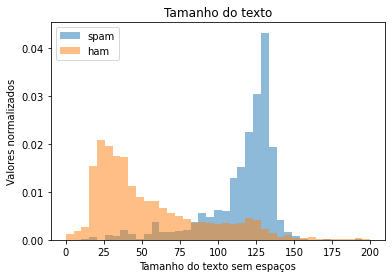

In [36]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(0, 200, 40)

plt.title("Tamanho do texto")
plt.xlabel("Tamanho do texto sem espaços")
plt.ylabel('Valores normalizados')
plt.hist(data[data['classe']=='spam']['tamanho_texto'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['classe']=='ham']['tamanho_texto'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.show()

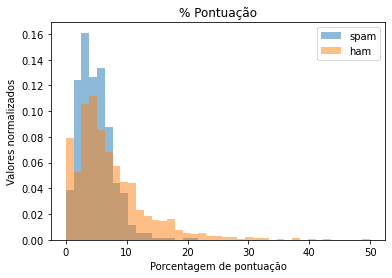

In [37]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['classe']=='spam']['%pontuacao'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['classe']=='ham']['%pontuacao'], bins, alpha=0.5, density=True, label='ham')
plt.title("% Pontuação")
plt.xlabel("Porcentagem de pontuação")
plt.ylabel('Valores normalizados')
plt.legend(loc='upper right')
plt.show()

## Realizando a classificação:
----

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def clean_text(texto):
    text = "".join([word.lower() for word in texto if word not in string.punctuation])  # Remove pontuação
    tokens = token_espaco.tokenize(text)  # Tokeniza a frase
    text_sem_stopwords = [ps.stem(word) for word in tokens if word not in stopword]  # Remove stopwords
    text_final = [ps.stem(word) for word in text_sem_stopwords]  # Stemming
    return text_final

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['texto'])
X_tfidf_feat = pd.concat([data['tamanho_texto'], data['%pontuacao'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer / Bag of Words
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['texto'])
X_count_feat = pd.concat([data['tamanho_texto'], data['%pontuacao'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,tamanho_texto,%pontuacao,0,1,2,3,4,5,6,7,...,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167
0,160,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_tfidf_feat.head()

,tamanho_texto,%pontuacao,0,1,2,3,4,5,6,7,...,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Utilizando o random forest:

from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_feat, data['classe'], random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9762931034482759

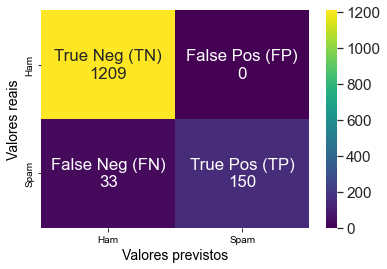

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

"""
Spam ou Ham?

0 -> Ham
1 -> Spam
"""

valores_preditos = rf.predict(X_test)
valores_reais = y_test

cm = confusion_matrix(valores_reais, valores_preditos)

groups_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
group_counts = [f"{value}" for value in cm.flatten()]
labels = [f"{v1}" for v1 in groups_names]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(groups_names, group_counts)]

labels = np.asarray(labels).reshape(cm.shape)

ax = plt.subplot()
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=labels, ax=ax, cmap="viridis", fmt="")

label_font = {'size':'14'}  
ax.set_xlabel('Valores previstos', fontdict=label_font);
ax.set_ylabel('Valores reais', fontdict=label_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(['Ham', 'Spam']);
ax.yaxis.set_ticklabels(['Ham', 'Spam']);

## Prevendo uma nova frase:

____

In [42]:
def classificar_sms(texto):
    frase_tfidf = tfidf_vect.transform([texto])
    texto_teste = pd.DataFrame.sparse.from_spmatrix(frase_tfidf)
    texto_teste.insert(0, 'tamanho_texto', len(frase) - frase.count(" "))
    texto_teste.insert(1, '%pontuacao', count_punct(frase)) 
    return texto_teste

In [43]:
"""
Por favor, ligue para o nosso representante de atendimento ao cliente no TELEFONE GRATUITO 4002 8922 entre 9h e 23h, 
pois você ganhou um carro
"""

frase = "Please call our customer service representative on FREEPHONE 4002 8922 between 9am-11pm as you have WON a car"


In [44]:
rf.predict(classificar_sms(frase))

array(['spam'], dtype=object)